In [3]:
!python --version

Python 3.10.11


In [4]:
!python -m pip install datasets

  Using cached datasets-2.20.0-py3-none-any.whl (547 kB)
     ---------------------------------------- 0.0/370.7 kB ? eta -:--:--
     ------------------ ------------------- 184.3/370.7 kB 3.7 MB/s eta 0:00:01
     -------------------------------------- 370.7/370.7 kB 5.8 MB/s eta 0:00:00
     ---------------------------------------- 0.0/25.9 MB ? eta -:--:--
     -- ------------------------------------- 1.4/25.9 MB 29.0 MB/s eta 0:00:01
     --- ------------------------------------ 2.5/25.9 MB 26.8 MB/s eta 0:00:01
     ------ --------------------------------- 4.2/25.9 MB 33.8 MB/s eta 0:00:01
     -------- ------------------------------- 5.8/25.9 MB 36.9 MB/s eta 0:00:01
     ----------- ---------------------------- 7.4/25.9 MB 36.2 MB/s eta 0:00:01
     ------------- -------------------------- 8.9/25.9 MB 35.4 MB/s eta 0:00:01
     --------------- ----------------------- 10.5/25.9 MB 34.4 MB/s eta 0:00:01
     ----------------- --------------------- 11.8/25.9 MB 36.4 MB/s eta 0:00:0


[notice] A new release of pip is available: 23.0.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from models import GPT_MODEL_ID

c:\Users\Yang\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'dotenv'

In [1]:
GPT_MODEL_ID = {
    "xsum_2_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8nc8TgDp",
    "xsum_10_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8nYmytb4",
    "xsum_500_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8kP7i66k",
    "xsum_always_1_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8nZloDpW",
    "xsum_random_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8nZloDpW",
    "xsum_readability_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8oLO7FOF",
    "xsum_length_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8ooNDQYs",
    "xsum_vowelcount_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8ooNNbtT",
    "cnn_2_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8rX9zfcC",
    "cnn_10_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8rXDPMYM",
    "cnn_500_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8rYivqW8",
    "cnn_always_1_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8rYwud4k",
    "cnn_random_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8rYvYVKD",
    "cnn_readability_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8rbOOAw9",
    "cnn_length_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8rbPCDli",
    "cnn_vowelcount_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8raOJ2nT",
}

In [2]:
GPT_MODEL_ID.keys()

dict_keys(['xsum_2_ft_gpt35', 'xsum_10_ft_gpt35', 'xsum_500_ft_gpt35', 'xsum_always_1_ft_gpt35', 'xsum_random_ft_gpt35', 'xsum_readability_ft_gpt35', 'xsum_length_ft_gpt35', 'xsum_vowelcount_ft_gpt35', 'cnn_2_ft_gpt35', 'cnn_10_ft_gpt35', 'cnn_500_ft_gpt35', 'cnn_always_1_ft_gpt35', 'cnn_random_ft_gpt35', 'cnn_readability_ft_gpt35', 'cnn_length_ft_gpt35', 'cnn_vowelcount_ft_gpt35'])

In [2]:
import os, json
import matplotlib.pyplot as plt
def make_folder_path(file_path):
    os.makedirs(os.path.dirname(file_path))

def save_to_json(dictionary, file_name):
    with open(file_name, "w") as f:
        json.dump(dictionary, f)


def load_from_json(file_name) -> dict:
    with open(file_name, "r") as f:
        return json.load(f)
    
def process_comparisons(dataset, file):
    save_file = f"{file}"
    comparison_data = load_from_json(save_file)

    new_pref = 0
    for result in comparison_data.values():
        new_pref += result["forward"]["1"] / sum(result["forward"].values())
        new_pref += result["backward"]["2"] / sum(result["backward"].values())

    new_pref /= len(comparison_data) * 2

    print(file, dataset, str(new_pref))
    
    return new_pref
    
def process_comparisons1(dataset, file):
    save_file = f"{file}"
    comparison_data = load_from_json(save_file)

    new_pref = 0
    for result in comparison_data:
        new_pref += result["forward"]["1"] / sum(result["forward"].values())
        new_pref += result["backward"]["2"] / sum(result["backward"].values())

    new_pref /= len(comparison_data) * 2

    print(file, dataset, str(new_pref))

In [7]:
process_comparisons('xsum','xsum_2_ft_gpt35_comparisons.json')

xsum_2_ft_gpt35_comparisons.json xsum 0.5047232957602222


In [15]:

process_comparisons1('xsum','comparisons/cnn/cnn_random_ft_llama_comparisons.json')
process_comparisons1('xsum','comparisons/cnn/cnn_random_ft_gpt35_comparisons.json')

comparisons/cnn/cnn_random_ft_llama_comparisons.json xsum 0.500691366792645


KeyError: 'forward'

In [11]:
model_id_x = {
    "xsum_2_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8nc8TgDp",
    "xsum_10_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8nYmytb4",
    "xsum_500_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8kP7i66k",
    "xsum_always_1_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8nZloDpW",
    "xsum_random_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8nZloDpW",
    "xsum_readability_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8oLO7FOF",
    "xsum_length_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8ooNDQYs",
    "xsum_vowelcount_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8ooNNbtT"
}
model_id_c = {
    "cnn_2_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8rX9zfcC",
    "cnn_10_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8rXDPMYM",
    "cnn_500_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8rYivqW8",
    "cnn_always_1_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8rYwud4k",
    "cnn_random_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8rYvYVKD",
    "cnn_readability_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8rbOOAw9",
    "cnn_length_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8rbPCDli",
    "cnn_vowelcount_ft_gpt35": "ft:gpt-3.5-turbo-1106:nyu-arg::8raOJ2nT"
}

llama2 comparison with other model(preference)

folder/xsum_2_ft_gpt35_comparisons.json xsum 0.504723295760222
folder/xsum_10_ft_gpt35_comparisons.json xsum 0.509107392412095
folder/xsum_500_ft_gpt35_comparisons.json xsum 0.42474225199161436
folder/xsum_always_1_ft_gpt35_comparisons.json xsum 0.45464116790578374
folder/xsum_random_ft_gpt35_comparisons.json xsum 0.45126270695882253
folder/xsum_readability_ft_gpt35_comparisons.json xsum 0.46978540182173595
folder/xsum_length_ft_gpt35_comparisons.json xsum 0.4664779594426124
folder/xsum_vowelcount_ft_gpt35_comparisons.json xsum 0.46046207595546546


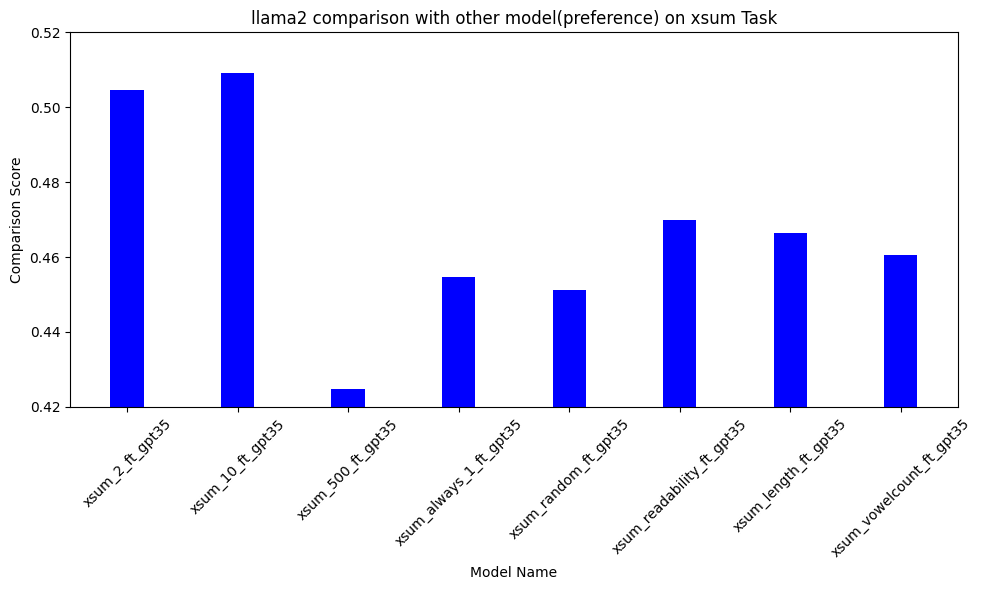

In [9]:
print('llama2 comparison with other model(preference)\n')
results = {}
for key in model_id_x.keys():
    results[key] = process_comparisons('xsum',f'folder/{key}_comparisons.json')
    
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='blue',width=0.3)
plt.xlabel('Model Name')
plt.ylabel('Comparison Score')
plt.title('llama2 comparison with other model(preference) on xsum Task')
plt.xticks(rotation=45)
plt.ylim(0.42, 0.52)
plt.tight_layout()
plt.show()

folder/cnn_2_ft_gpt35_comparisons.json cnn 0.486083214682901
folder/cnn_10_ft_gpt35_comparisons.json cnn 0.4819275681108695
folder/cnn_500_ft_gpt35_comparisons.json cnn 0.4760209344717786
folder/cnn_always_1_ft_gpt35_comparisons.json cnn 0.5029016089358931
folder/cnn_random_ft_gpt35_comparisons.json cnn 0.49905354687151815
folder/cnn_readability_ft_gpt35_comparisons.json cnn 0.5159699879080253
folder/cnn_length_ft_gpt35_comparisons.json cnn 0.49869666927461737
folder/cnn_vowelcount_ft_gpt35_comparisons.json cnn 0.4957548398950821


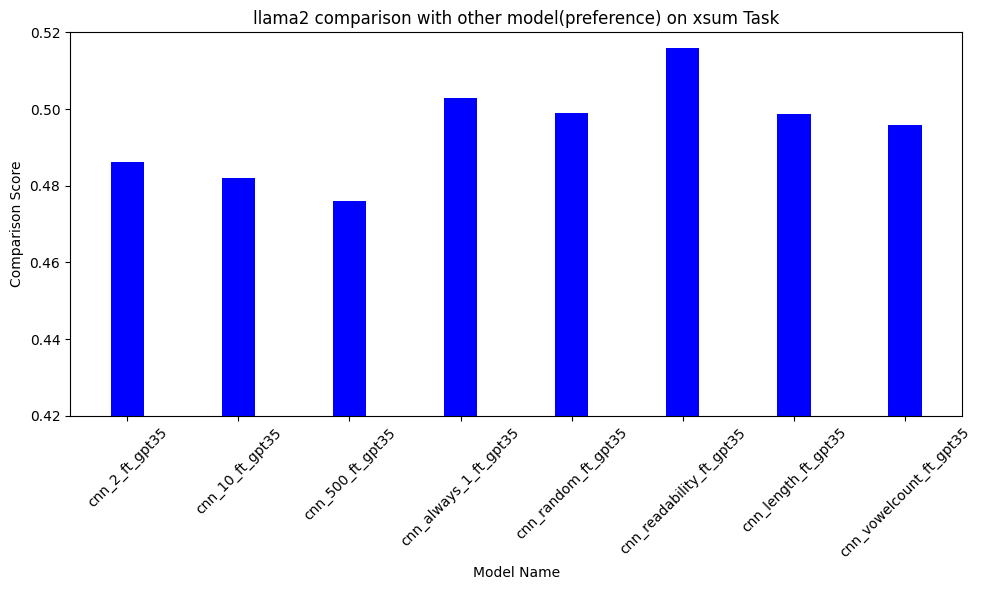

In [12]:
results = {}
for key in model_id_c.keys():
    results[key] = process_comparisons('cnn',f'folder/{key}_comparisons.json')
    
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='blue',width=0.3)
plt.xlabel('Model Name')
plt.ylabel('Comparison Score')
plt.title('llama2 comparison with other model(preference) on xsum Task')
plt.xticks(rotation=45)
plt.ylim(0.42, 0.52)
plt.tight_layout()
plt.show()

In [5]:
datasets = ['x','c']
results = {}
print('Preference:\n\nllama3 using llama2 prompt:')
for e in datasets:
    process_comparisons('xsum',f'folder/llama3_2_comparisons({e}).json')
    
print('\nllama3 using llama3 prompt:')
for e in datasets:
    process_comparisons('xsum',f'folder/llama3_2_comparisons ({e}).json')

Preference:

llama3 using llama2 prompt:
folder/llama3_2_comparisons(x).json xsum 0.4980699082183328
folder/llama3_2_comparisons(c).json xsum 0.4982056782506374

llama3 using llama3 prompt:
folder/llama3_2_comparisons (x).json xsum 0.49254660666740185
folder/llama3_2_comparisons (c).json xsum 0.4969369083656565


In [4]:
print('recognition aka detection')
dataset = ['xsum','cnn']
print('\nllama2_3:')
code = '2_3'
for i in dataset:
    process_comparisons(i,f'folder/[recognition]llama{code}_comparisons({i}).json')

print('\nllama3_2:')
code = '3_2'
for i in dataset:
    process_comparisons(i,f'folder/[recognition]llama{code}_comparisons({i}).json')



recognition aka detection

llama2_3:
folder/[recognition]llama2_3_comparisons(xsum).json xsum 0.49685565984372615
folder/[recognition]llama2_3_comparisons(cnn).json cnn 0.5429064117762968

llama3_2:
folder/[recognition]llama3_2_comparisons(xsum).json xsum 0.49570924758971996
folder/[recognition]llama3_2_comparisons(cnn).json cnn 0.49651696107103016


In [5]:
print('Exist comparison\n')
for key in GPT_MODEL_ID.keys():
    if key.startswith('xsum'):
        process_comparisons1('xsum',f'comparisons/xsum/{key}_comparisons.json')
    if key.startswith('cnn'):
        process_comparisons1('xsum',f'comparisons/cnn/{key}_comparisons.json')

Exist comparison



KeyError: 'forward'